In [22]:
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.tag import pos_tag
from textblob import TextBlob
import json

text = open('HarryPotter.txt')
text = text.read()

with open('paragraphs.json', 'r') as fp:
    paragraphs =  json.load(fp)
with open('words.json', 'r') as fp:
    words =  json.load(fp)  
with open('sentences.json', 'r') as fp:
    sentences =  json.load(fp)

    
#Create a function that takes in a name and returns a positive / negative score for polarity 
    
def protagonist_score(candidate,paragraph_list):
    score = 0
    for paragraph in paragraph_list:
        blob = TextBlob(paragraph)
        if candidate in paragraph and blob.polarity>0.5:
            score = score + 30*blob.polarity
        elif candidate in paragraph and blob.polarity<-0.5:
            score = score + 30*blob.polarity
        elif candidate in paragraph and blob.polarity>0.1:
            score = score + 10*blob.polarity
        elif candidate in paragraph and blob.polarity<-0.1:
            score = score + 20*blob.polarity
    return score

In [21]:
print(protagonist_score('Harry',paragraphs))
print('Gryffindor: ', protagonist_score('Gryffindor',sentences))
print('Slytherin: ', protagonist_score('Slytherin',sentences))
print('Hufflepuff: ', protagonist_score('Hufflepuff',sentences))
print('Ravenclaw: ', protagonist_score('Ravenclaw',sentences))


89.14407831035827
Gryffindor:  121.69565897065897
Slytherin:  -13.441137566137563
Hufflepuff:  -2.2592592592592586
Ravenclaw:  -15.052609427609422


In [16]:
# Create a protagonist index dictionary that contains all the protagonists and their associated protagonist scores

stop_words = set(stopwords.words("english"))
protagonist_index = {}
freq_distribution = FreqDist(words)
freq_d = dict(freq_distribution)
ranked_list = sorted(freq_d, key=freq_d.get, reverse = True)
tagged_text = pos_tag(text.split())
proper_nouns = [word for word,pos in tagged_text if pos == 'NNP']

ranked_list.remove('A') # you can manually remove any other anomalies

for candidate in ranked_list:
    if candidate in proper_nouns and candidate.istitle() and candidate not in stop_words:
        protagonist_index[candidate] = protagonist_score(candidate,paragraphs)

print(protagonist_index)

{'Harry': 89.14407831035827, 'Ron': 113.5947128383682, 'Hagrid': 136.66117728832015, 'Hermione': -7.25059924643257, 'Professor': 32.75639932488148, 'Snape': -165.27341269841267, 'Dumbledore': 192.33931870047945, 'Dudley': -142.93600455333646, 'Uncle': -29.00138029959459, 'Malfoy': -123.49138407888408, 'Vernon': -64.3188406170549, 'Neville': -119.87260101010101, 'Potter': 129.00139104722436, 'Quirrell': -48.2785135774719, 'Gryffindor': 70.52939438647772, 'Hogwarts': 20.369079438478785, 'Well': 35.5076708014208, 'No': -46.871129876016234, 'Oh': 23.658017676767678, 'Quidditch': 92.69451577462938, 'Petunia': -53.42662509448223, 'Stone': 27.49425805675807, 'Dursley': -72.98409052820817, 'Dursleys': -45.28243570155335, 'Aunt': -27.16472033257748, 'So': -4.355641303141294, 'Wood': 73.06700438450437, 'All': 36.55900179516249, 'Slytherin': 62.25316099244671, 'Weasley': 28.036372269705602, 'Filch': 3.797811447811442, 'How': 79.9592306998557, 'Madam': -17.58384239217573, 'Percy': 17.9257757954727

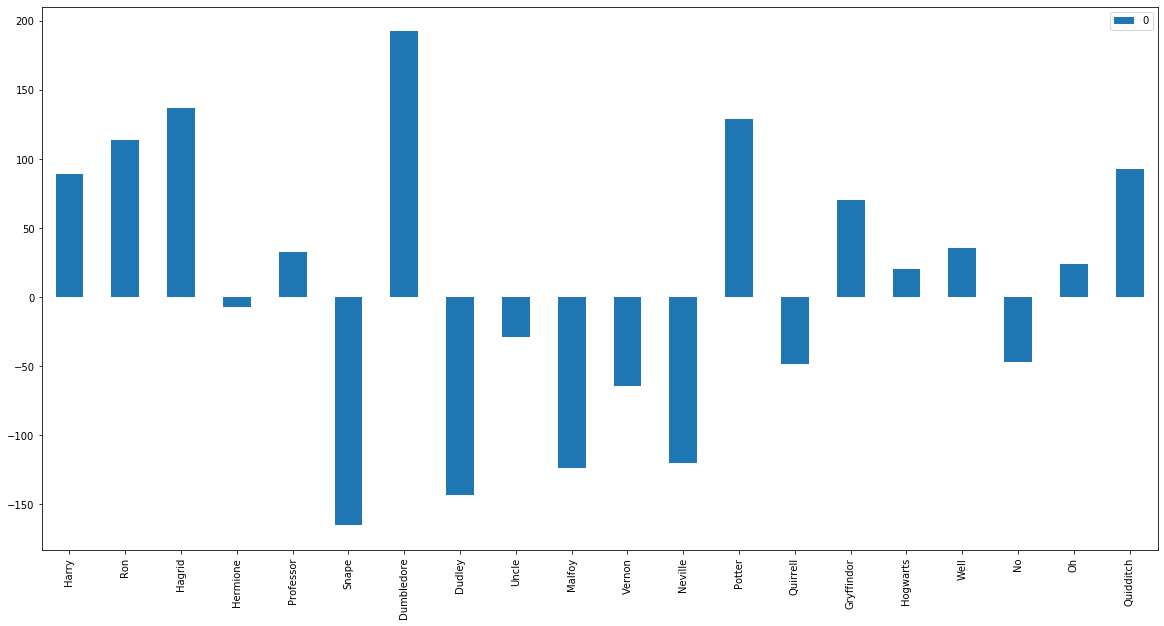

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame.from_dict(protagonist_index, orient = 'index').iloc[0:20]
#print(df)

df.plot.bar(figsize = (20,10))
#df.plot(figsize = (10,10)).bar()